This dataset is based on Amazon branded/Amazon manufactured products only, 
and Customer satisfaction with Amazon products seem to be the main focus here.

Potential suggestion for product reviews:
Product X is highly rated on the market, it seems most people like its lightweight 
sleek design and fast speeds. Most products that were associated with negative reviews 
seemed to indicate that they were too heavy and they 
couldn't fit them in the bags. We suggest that next gen models for e-readers are 
lightweight and portable, based on this data we've looked at.

Assumptions:

We're assuming that sample size of 30K examples are sufficient to represent the entire population of sales/reviews
We're assuming that the information we find in the text reviews of each product will be rich enough to train a
sentiment analysis classifier with accuracy (hopefully) > 70%


# Quick Look at the Raw Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline 


In [13]:
data=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\1429_1.csv")


In [14]:
data.head(2)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


We can potentially refine sentiment analysis with the reviews.text column, 
with the actual rating of reviews.doRecommend column (boolean)

We can also label each review based on each sentiment


In [59]:
data = data.copy()
data.describe()


,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


Based on the descriptive statistics above, we see the following:

Average review score of 4.58, with low standard deviation
Most review are positive from 2nd quartile onwards
The average for number of reviews helpful (reviews.numHelpful) is 0.6 but high standard deviation

The data are pretty spread out around the mean, and since can't have negative people finding something helpful, then this is only on the right tail side
The range of most reviews will be between 0-13 people finding helpful (reviews.numHelpful)

The most helpful review was helpful to 814 people
This could be a detailed, rich review that will be worth looking at
d

In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [17]:
data["asins"].unique()


array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [18]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))


Number of Unique ASINs: 42


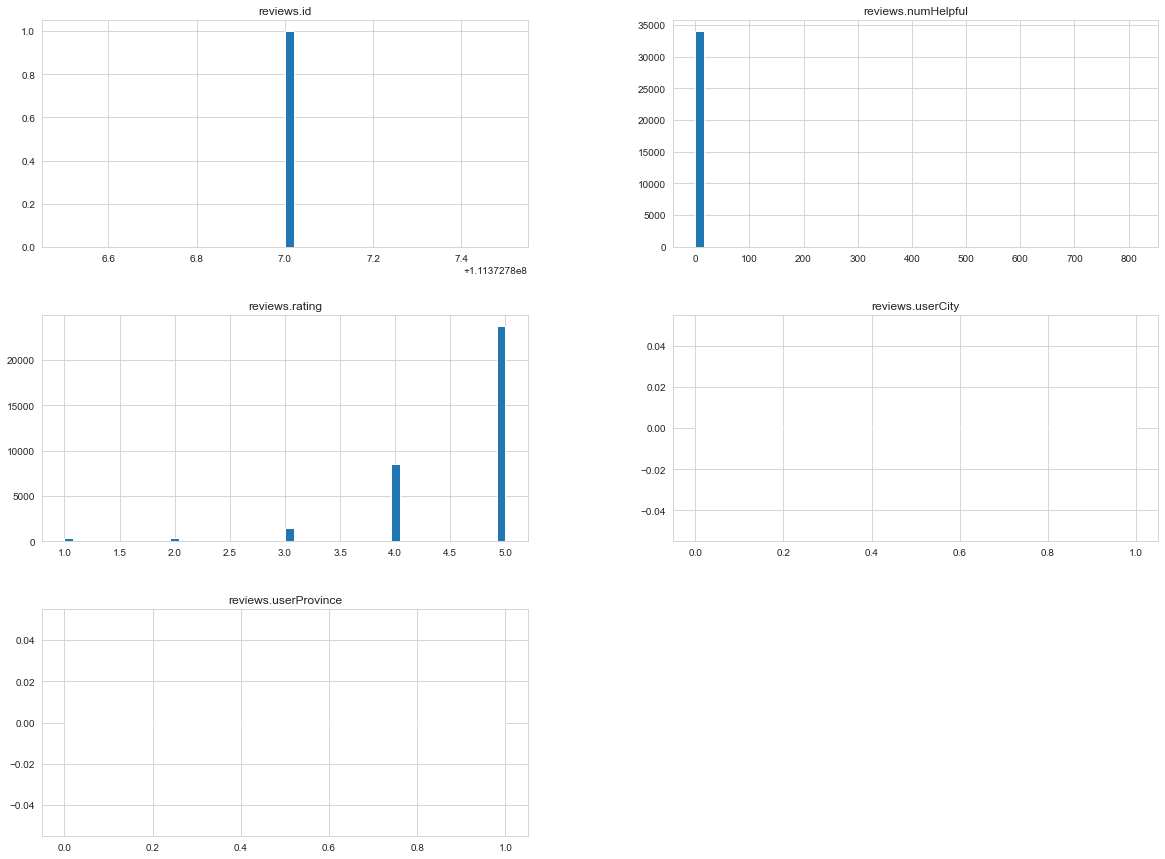

In [19]:
data.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)


Before 34660
After 34627


In [21]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)


In [22]:
len(strat_train)


27701

In [23]:
strat_train["reviews.rating"].value_counts()/len(strat_train) # value_count() counts all the values based on column


5.0    0.686257
4.0    0.247067
3.0    0.043031
2.0    0.011805
1.0    0.010938
Name: reviews.rating, dtype: float64

In [24]:
len(strat_test)


6926

In [25]:
strat_test["reviews.rating"].value_counts()/len(strat_test)


5.0    0.685533
4.0    0.244586
3.0    0.044037
1.0    0.014005
2.0    0.010684
Name: reviews.rating, dtype: float64

In [26]:
reviews = strat_train.copy()
reviews.head(2)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
2392,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-08T00:00:00.000Z,2017-05-21T06:03:21Z,"2017-04-30T00:45:00.000Z,2017-06-07T09:03:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"Easy to use, fast, sleek and battery holds goo...",Love it,NaN,NaN,Maljr123
29952,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2016-06-23T00:00:00.000Z,2017-09-20T05:35:59Z,"2017-08-25T22:40:37.270Z,2017-08-19T09:25:31.0...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,Perfect gift. My family love it! Have one in e...,Perfect,NaN,NaN,Dscott9218


In [27]:
len(reviews["name"].unique()), len(reviews["asins"].unique())


(46, 36)

In [28]:
reviews.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 2392 to 13901
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27676 non-null  object 
 1   name                  22370 non-null  object 
 2   asins                 27675 non-null  object 
 3   brand                 27676 non-null  object 
 4   categories            27676 non-null  object 
 5   keys                  27676 non-null  object 
 6   manufacturer          27676 non-null  object 
 7   reviews.date          27656 non-null  object 
 8   reviews.dateAdded     19221 non-null  object 
 9   reviews.dateSeen      27676 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27245 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27293 non-null  float64
 14  reviews.rating        27676 non-null  float64
 15  reviews.sourceUR

In [29]:
reviews.groupby("asins")["name"].unique()


asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nKin...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE         

In [30]:
# Lets see all the different names for this product that have 2 ASINs
different_names = reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
nan
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Coconut Water Red Tea 16.5 Oz (pack of 12),,,
Amazon Fire Tv,,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,

New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
Amazon 5W USB Official OEM Charge

In [31]:
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()


Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2357
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              2007
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,                                                                           254
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,                                                           110
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Offici

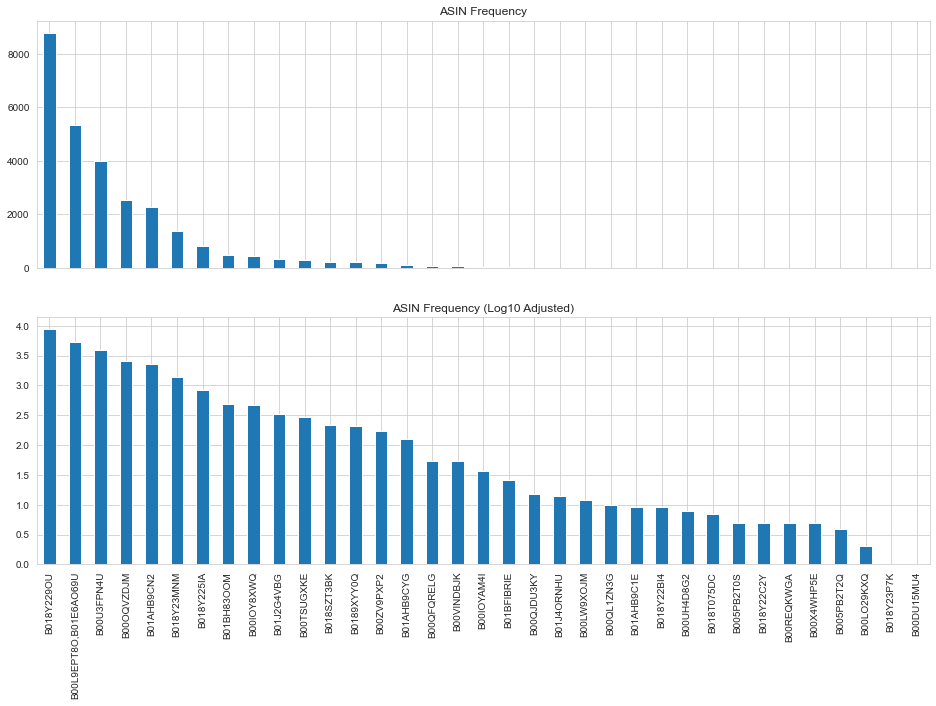

In [32]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

In [33]:
reviews["reviews.rating"].mean()


4.587331984390808

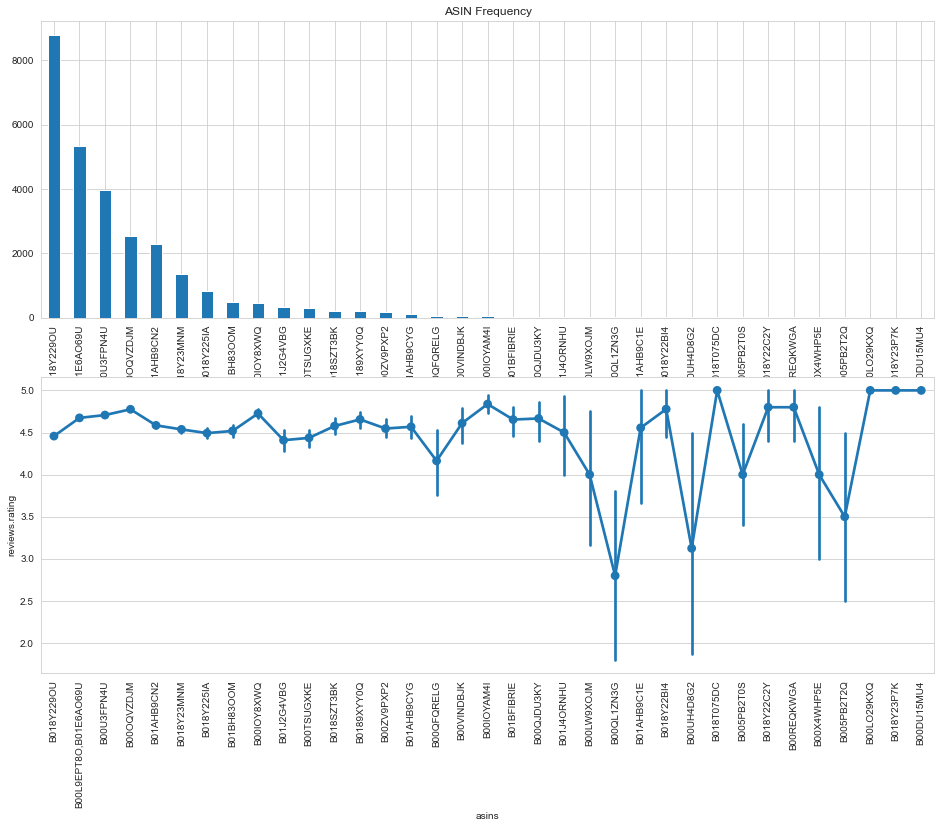

In [34]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

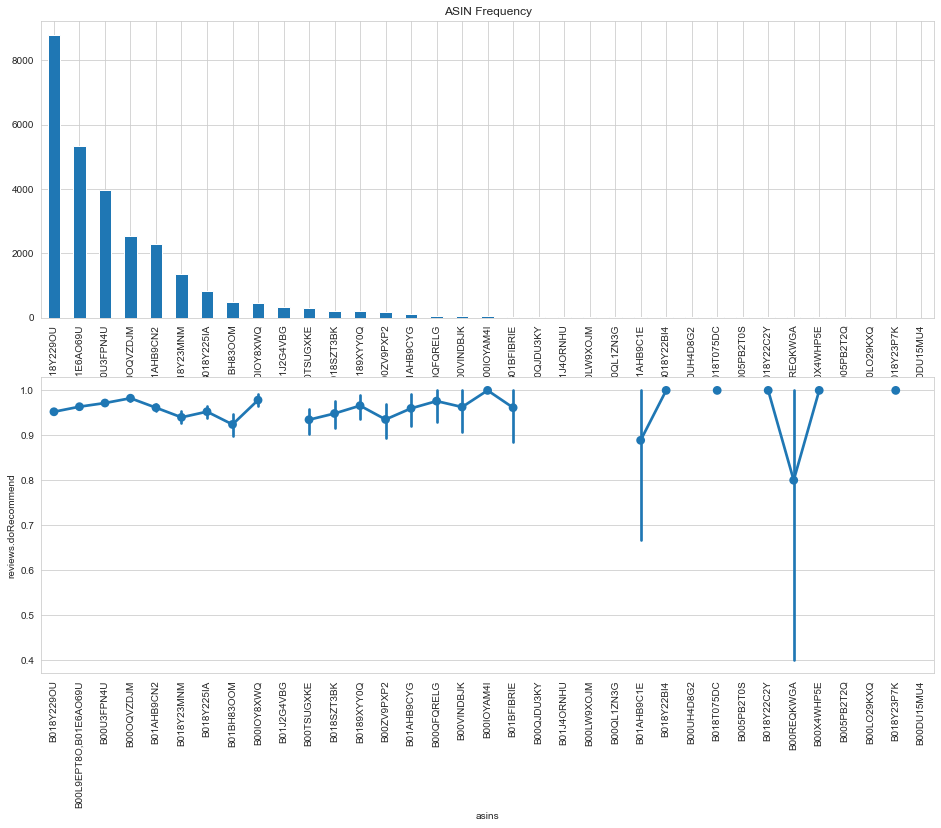

In [35]:
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

In [36]:
corr_matrix = reviews.corr()
corr_matrix

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.000000,-0.045199,NaN,NaN
reviews.rating,NaN,-0.045199,1.000000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [37]:
reviews.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 2392 to 13901
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27676 non-null  object 
 1   name                  22370 non-null  object 
 2   asins                 27675 non-null  object 
 3   brand                 27676 non-null  object 
 4   categories            27676 non-null  object 
 5   keys                  27676 non-null  object 
 6   manufacturer          27676 non-null  object 
 7   reviews.date          27656 non-null  object 
 8   reviews.dateAdded     19221 non-null  object 
 9   reviews.dateSeen      27676 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27245 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27293 non-null  float64
 14  reviews.rating        27676 non-null  float64
 15  reviews.sourceUR

In [38]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()


,asins
B018Y229OU,8786
"B00L9EPT8O,B01E6AO69U",5328
B00U3FPN4U,3985
B00OQVZDJM,2527
B01AHB9CN2,2286


In [39]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()


,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.500000
B00DU15MU4,5.000000
B00IOY8XWQ,4.725702
B00IOYAM4I,4.837838


In [40]:
table = counts.join(avg_rating)
table.head(30)


,asins,reviews.rating
B018Y229OU,8786,4.457432
"B00L9EPT8O,B01E6AO69U",5328,4.673611
B00U3FPN4U,3985,4.707152
B00OQVZDJM,2527,4.775623
B01AHB9CN2,2286,4.584864
B018Y23MNM,1367,4.536942
B018Y225IA,824,4.492718
B01BH83OOM,490,4.518367
B00IOY8XWQ,463,4.725702
B01J2G4VBG,328,4.408537


,asins,reviews.rating
asins,1.000000,0.105086
reviews.rating,0.105086,1.000000


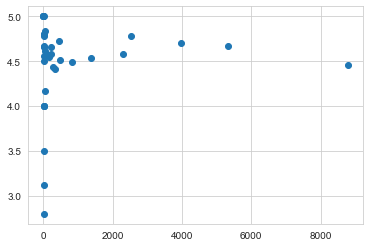

In [41]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()


In [42]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]


2392     Positive
29952    Positive
34460    Positive
894      Positive
21255    Positive
13529    Positive
7911     Positive
2226     Negative
29356    Positive
23758    Negative
33926    Positive
1845     Positive
3169     Positive
33888    Positive
5848      Neutral
31329    Positive
17595    Positive
11883    Positive
5141     Positive
18425    Positive
Name: Sentiment, dtype: object

In [43]:
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

27701 6926


In [44]:
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape


(27701, 12525)

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape


(27701, 12525)

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [47]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)


0.9301183944556742

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)


0.9340167484839734

In [49]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9360381172393878

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)


0.8961882760612186

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)


0.9318509962460294

In [71]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.936326884204447

Here we will run a Grid Search of the best parameters on a grid of possible values, instead of tweaking the parameters of various components of the chain (ie. use_idf in tfidftransformer)
We will also run the grid search with LinearSVC classifier pipeline, parameters and cpu core maximization
Then we will fit the grid search to our training data set
Next we will use our final classifier (after fine-tuning) to test some arbitrary reviews
Finally we will test the accuracy of our final classifier (after fine-tuning)


In [72]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, 
                             gs_clf_LinearSVC_pipe.best_estimator_, 
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

0.9380887796061783
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('clf_linearSVC', LinearSVC())])
{'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


Here we see that the best mean score of the grid search is 93.65% which is very close to our accuracy level of 94.08%

Our best estimator here is also displayed
Lastly, our best parameters are true for use_idf in tfidf, and ngram_range between 1,2


In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         8
    Negative       0.66      0.27      0.39       171
     Neutral       0.47      0.09      0.15       305
    Positive       0.94      1.00      0.97      6442

    accuracy                           0.94      6926
   macro avg       0.52      0.34      0.38      6926
weighted avg       0.91      0.94      0.92      6926

Accuracy: 0.936326884204447


Below is the summary of the classification report:

Precision: determines how many objects selected were correct
Recall: tells you how many of the objects that should have been selected were actually selected
F1 score measures the weights of recall and precision (1 means precision and recall are equally important, 0 otherwise)

Support is the number of occurrences of each class
The results in this analysis confirms our previous data exploration analysis, where the data are very skewed to the positive reviews as shown by the lower support counts in the classification report. Also, both neutral and negative reviews has large standard deviation with small frequencies, which we would not consider significant as shown by the lower precision, recall and F1 scores in the classification report.

However, despite that Neutral and Negative results are not very strong predictors in this data set, it still shows a 94.08% accuracy level in predicting the sentiment analysis, which we tested and worked very well when inputting arbitrary text (new_text). Therefore, we are comfortable here with the skewed data set. Also, as we continue to input new dataset in the future that is more balanced, this model will then re-adjust to a more balanced classifier which will increase the accuracy level.

Note: The first row will be ignored as we previously replaced all NAN with " ". We tried to remove this row when we first imported the raw data, but Pandas DataFrame did not like this row removed when we tried to drop all NAN (before stratifying and splitting the dataset). As a result, replacing the NAN with " " was the best workaround and the first row will be ignored in this analysis.

Finally, the overall result here explains that the products in this dataset are generally positively rated.



In [74]:
from sklearn import metrics
metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)


array([[   0,    0,    0,    8],
       [   0,   47,   11,  113],
       [   0,   13,   28,  264],
       [   0,   11,   21, 6410]], dtype=int64)

As a result, we need to input more data in order to consider the significance of lower rated product, in order to determine which products should be dropped from Amazon's product roster.

The good news is that despite the skewed dataset, we were still able to build a robust Sentiment Analysis machine learning system to determine if the reviews are positive or negative. This is possible as the machine learning system was able to learn from all the positive, neutral and negative reviews, and fine tune the algorithm in order to avoid bias sentiments.

In conclusion, although we need more data to balance out the lower rated products to consider their significance, however we were still able to successfully associate positive, neutral and negative sentiments for each product in Amazon's Catalog.